# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/kaggle/input/gtsrb-german-traffic-sign/Meta.csv
/kaggle/input/gtsrb-german-traffic-sign/Train.csv
/kaggle/input/gtsrb-german-traffic-sign/Test.csv
/kaggle/input/gtsrb-german-traffic-sign/Meta/37.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/35.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/11.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/31.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/4.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/40.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/33.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/9.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/.~lock.ClassesInformation.ods#
/kaggle/input/gtsrb-german-traffic-sign/Meta/14.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/1.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/39.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/20.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/38.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/2.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/10.png


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Exploring the Dataset

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
data_dir = 'gtsrb-german-traffic-sign'
train_path = 'gtsrb-german-traffic-sign/Train'
test_path = 'gtsrb-german-traffic-sign/'
IMG_HEIGHT = 30
IMG_WIDTH = 30


In [5]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [6]:
for category in range(NUM_CATEGORIES):
        categories = os.path.join(train_path, str(category))
        for img in os.listdir(categories):
            image = Image.open(os.path.join(categories, img))
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(category)

In [7]:
data = np.array(data)
labels = np.array(labels)

In [8]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=52)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [11]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Builing CNN model

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Training and Validation

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, batch_size=32, epochs=12, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/12
981/981 [==============================] - 88s 90ms/step - loss: 1.9690 - accuracy: 0.5062 - val_loss: 0.4151 - val_accuracy: 0.9068
Epoch 2/12
981/981 [==============================] - 86s 88ms/step - loss: 0.5565 - accuracy: 0.8374 - val_loss: 0.2474 - val_accuracy: 0.9287
Epoch 3/12
981/981 [==============================] - 81s 82ms/step - loss: 0.3465 - accuracy: 0.9001 - val_loss: 0.1170 - val_accuracy: 0.9667
Epoch 4/12
981/981 [==============================] - 82s 84ms/step - loss: 0.2789 - accuracy: 0.9216 - val_loss: 0.0897 - val_accuracy: 0.9765
Epoch 5/12
981/981 [==============================] - 87s 89ms/step - loss: 0.2526 - accuracy: 0.9305 - val_loss: 0.0771 - val_accuracy: 0.9774
Epoch 6/12
981/981 [==============================] - 84s 86ms/step - loss: 0.2409 - accuracy: 0.9367 - val_loss: 0.0569 - val_accuracy: 0.9855
Epoch 7/12
981/981 [==============================] - 82s 83ms/step - loss: 0.2158 - accuracy: 0.9439 - val_loss: 0.0505 - val_accuracy:

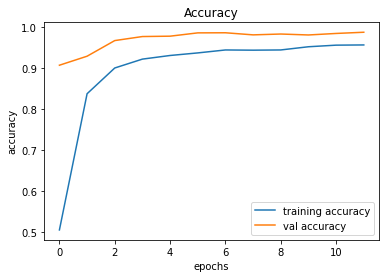

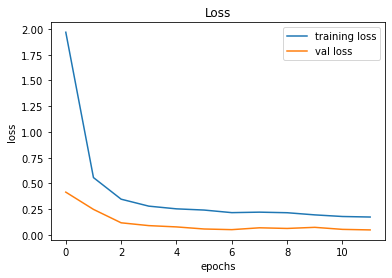

In [15]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing Model with Test data

In [16]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv(test_path+'Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [17]:
data=[]

for img in imgs:
    image = Image.open(os.path.join(test_path+img))
    image = image.resize((30,30))
    data.append(np.array(image))

In [18]:
X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print('Test Data Accuracy Score',accuracy_score(labels, pred)*100)

Test Data Accuracy Score 96.70625494853523


In [19]:
labels.shape

(12630,)

# Visualizing Test results

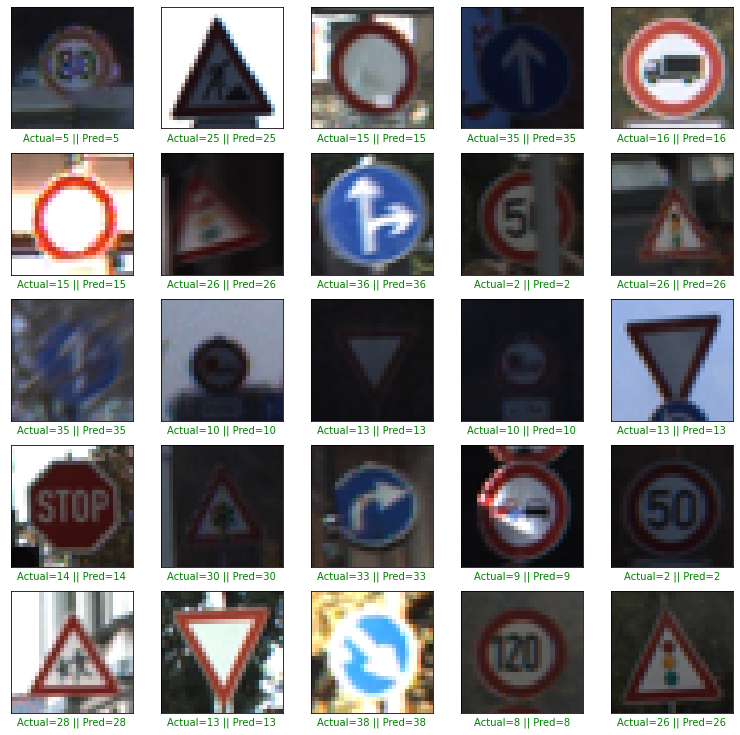

In [20]:
import random
plt.figure(figsize = (13, 13))

start_index = 0
for j in range(25):
    i=random.randint(0,12630)
    plt.subplot(5, 5, j + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()